<a href="https://colab.research.google.com/github/ksulaiman1/MCS-7227/blob/main/NRM_MPS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_val_predict, ShuffleSplit

from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor

# from xgboost import XGBRFRegressor, XGBRegressor
# from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_log_error

In [ ]:
df11m = pd.read_csv('2011_Mps.csv')

In [ ]:
df11m

,2011_Mps,2011_NRM_Mps,2011_NRM_Mps_Score,2011_NRM_Votes,2011_Opp_Mps,2011_Opp_Mps_Score,2011_Opp_Votes,2011_score,DISTRICT
0,1,1.0,0.591940,10649.0,0.0,0.408060,7341.0,1.000000,ABIM
1,1,1.0,0.428145,13925.0,0.0,0.571855,18599.0,1.000000,ADJUMANI
2,1,1.0,0.447174,20244.0,0.0,0.552826,25027.0,1.000000,AGAGO
3,2,1.0,0.187249,9454.0,1.0,0.812751,41035.0,0.500000,ALEBTONG
4,1,1.0,0.550186,19240.0,0.0,0.449814,15730.0,1.000000,AMOLATAR
...,...,...,...,...,...,...,...,...,...
106,2,1.0,0.132922,9167.0,1.0,0.867078,59798.0,0.500000,SOROTI
107,2,2.0,0.634727,43164.0,0.0,0.365273,24840.0,1.000000,SSEMBABULE
108,4,0.0,0.000000,0.0,4.0,1.000000,129234.0,0.000000,TORORO
109,7,2.0,0.117181,40031.0,5.0,0.882819,301586.0,0.285714,WAKISO


In [ ]:
df11w = pd.read_csv('WMP_2011.csv')

In [ ]:
df11w

,DISTRICT,2011_WNRM_Votes,2011_WNRM_Mps,2011_WMps,2011_Opp_WMps,2011_WOpp_Votes
0,ABIM,7762.0,1.0,1,0.0,10305.0
1,ADJUMANI,0.0,0.0,1,0.0,0.0
2,AGAGO,0.0,0.0,1,0.0,0.0
3,ALEBTONG,30061.0,1.0,1,0.0,19018.0
4,AMOLATAR,0.0,0.0,1,0.0,0.0
...,...,...,...,...,...,...
99,SOROTI,0.0,0.0,1,0.0,0.0
100,SSEMBABULE,42569.0,1.0,1,0.0,25691.0
101,TORORO,41165.0,1.0,1,0.0,85018.0
102,WAKISO,172442.0,1.0,1,0.0,180508.0


In [ ]:
df11w.DISTRICT.unique()


array(['ABIM', 'ADJUMANI', 'AGAGO', 'ALEBTONG', 'AMOLATAR', 'AMUDAT',
       'AMURIA', 'AMURU', 'APAC', 'ARUA', 'BUDAKA', 'BUDUDA', 'BUGIRI',
       'BUIKWE', 'BUKEDEA', 'BUKOMANSIMBI', 'BUKWO', 'BULAMBULI',
       'BULIISA', 'BUNDIBUGYO', 'BUSHENYI', 'BUTALEJA', 'BUTAMBALA',
       'BUVUMA', 'DOKOLO', 'GOMBA', 'GULU', 'HOIMA', 'IBANDA', 'IGANGA',
       'ISINGIRO', 'JINJA', 'KAABONG', 'KABALE', 'KABAROLE',
       'KABERAMAIDO', 'KALANGALA', 'KALIRO', 'KALUNGU', 'KAMPALA',
       'KAMULI', 'KAMWENGE', 'KANUNGU', 'KAPCHORWA', 'KASESE', 'KATAKWI',
       'KAYUNGA', 'KIBAALE', 'KIBOGA', 'KIRUHURA', 'KIRYANDONGO',
       'KISORO', 'KITGUM', 'KOBOKO', 'KOLE', 'KOTIDO', 'KUMI',
       'KYANKWANZI', 'KYEGEGWA', 'KYENJOJO', 'LAMWO', 'LIRA', 'LUUKA',
       'LUWEERO', 'LYANTONDE', 'MANAFWA', 'MARACHA', 'MASAKA', 'MASINDI',
       'MAYUGE', 'MBALE', 'MBARARA', 'MITOOMA', 'MITYANA', 'MOROTO',
       'MOYO', 'MPIGI', 'MUBENDE', 'MUKONO', 'NAKAPIRIPIRIT', 'NAKASEKE',
       'NAKASONGOLA', 'NAMAYING

In [ ]:
df11m.DISTRICT.unique()

array(['ABIM', 'ADJUMANI', 'AGAGO', 'ALEBTONG', 'AMOLATAR', 'AMUDAT',
       'AMURIA', 'AMURU', 'APAC', 'ARUA', 'BUDAKA', 'BUDUDA', 'BUGIRI',
       'BUHWEJU', 'BUIKWE', 'BUKEDEA', 'BUKOMANSIMBI', 'BUKWO',
       'BULAMBULI', 'BULIISA', 'BUNDIBUGYO', 'BUSHENYI', 'BUSIA',
       'BUTALEJA', 'BUTAMBALA', 'BUVUMA', 'BUYENDE', 'DOKOLO', 'GOMBA',
       'GULU', 'HOIMA', 'IBANDA', 'IGANGA', 'ISINGIRO', 'JINJA',
       'KAABONG', 'KABALE', 'KABAROLE', 'KABERAMAIDO', 'KALANGALA',
       'KALIRO', 'KALUNGU', 'KAMPALA', 'KAMULI', 'KAMWENGE', 'KANUNGU',
       'KAPCHORWA', 'KASESE', 'KATAKWI', 'KAYUNGA', 'KIBAALE', 'KIBOGA',
       'KIBUKU', 'KIRUHURA', 'KIRYANDONGO', 'KISORO', 'KITGUM', 'KOBOKO',
       'KOLE', 'KOTIDO', 'KUMI', 'KWEEN', 'KYANKWANZI', 'KYEGEGWA',
       'KYENJOJO', 'LAMWO', 'LIRA', 'LUUKA', 'LUWEERO', 'LWENGO',
       'LYANTONDE', 'MANAFWA', 'MARACHA', 'MASAKA', 'MASINDI', 'MAYUGE',
       'MBALE', 'MBARARA', 'MITOOMA', 'MITYANA', 'MOROTO', 'MOYO',
       'MPIGI', 'MUBENDE', 'MU

In [ ]:
set(df11m['DISTRICT']).difference(set(df11w['DISTRICT']))

{'BUHWEJU', 'BUSIA', 'BUYENDE', 'KIBUKU', 'KWEEN', 'LWENGO', 'SERERE'}

In [ ]:
wmp11 = df11m.merge(df11w, how='left', left_on='DISTRICT', right_on='DISTRICT')

In [ ]:
wmp11

,2011_Mps,2011_NRM_Mps,2011_NRM_Mps_Score,2011_NRM_Votes,2011_Opp_Mps,2011_Opp_Mps_Score,2011_Opp_Votes,2011_score,DISTRICT,2011_WNRM_Votes,2011_WNRM_Mps,2011_WMps,2011_Opp_WMps,2011_WOpp_Votes
0,1,1.0,0.591940,10649.0,0.0,0.408060,7341.0,1.000000,ABIM,7762.0,1.0,1.0,0.0,10305.0
1,1,1.0,0.428145,13925.0,0.0,0.571855,18599.0,1.000000,ADJUMANI,0.0,0.0,1.0,0.0,0.0
2,1,1.0,0.447174,20244.0,0.0,0.552826,25027.0,1.000000,AGAGO,0.0,0.0,1.0,0.0,0.0
3,2,1.0,0.187249,9454.0,1.0,0.812751,41035.0,0.500000,ALEBTONG,30061.0,1.0,1.0,0.0,19018.0
4,1,1.0,0.550186,19240.0,0.0,0.449814,15730.0,1.000000,AMOLATAR,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,1.0,0.132922,9167.0,1.0,0.867078,59798.0,0.500000,SOROTI,0.0,0.0,1.0,0.0,0.0
107,2,2.0,0.634727,43164.0,0.0,0.365273,24840.0,1.000000,SSEMBABULE,42569.0,1.0,1.0,0.0,25691.0
108,4,0.0,0.000000,0.0,4.0,1.000000,129234.0,0.000000,TORORO,41165.0,1.0,1.0,0.0,85018.0
109,7,2.0,0.117181,40031.0,5.0,0.882819,301586.0,0.285714,WAKISO,172442.0,1.0,1.0,0.0,180508.0


In [ ]:
wmp11.isna().sum()

2011_Mps              0
2011_NRM_Mps          0
2011_NRM_Mps_Score    0
2011_NRM_Votes        0
2011_Opp_Mps          0
2011_Opp_Mps_Score    0
2011_Opp_Votes        0
2011_score            0
DISTRICT              0
2011_WNRM_Votes       7
2011_WNRM_Mps         7
2011_WMps             7
2011_Opp_WMps         7
2011_WOpp_Votes       7
dtype: int64

In [ ]:
wmp11['2011_total_mps'] = wmp11['2011_Mps'] + wmp11['2011_WMps']

wmp11['2011_NRM_total_Mps'] = wmp11['2011_NRM_Mps'] +  wmp11['2011_WNRM_Mps']

wmp11['2011_NRM_total_Votes'] = wmp11['2011_NRM_Votes'] + wmp11['2011_WNRM_Votes']

wmp11['2011_total_Opp_Mps'] = wmp11['2011_Opp_Mps'] + wmp11['2011_Opp_WMps']

wmp11['2011_total_Opp_Votes'] = wmp11['2011_Opp_Votes'] + wmp11['2011_WOpp_Votes']

In [ ]:
wmp11.columns

Index(['2011_Mps', '2011_NRM_Mps', '2011_NRM_Mps_Score', '2011_NRM_Votes',
       '2011_Opp_Mps', '2011_Opp_Mps_Score', '2011_Opp_Votes', '2011_score',
       'DISTRICT', '2011_WNRM_Votes', '2011_WNRM_Mps', '2011_WMps',
       '2011_Opp_WMps', '2011_WOpp_Votes', '2011_total_mps',
       '2011_NRM_total_Mps', '2011_NRM_total_Votes', '2011_total_Opp_Mps',
       '2011_total_Opp_Votes'],
      dtype='object')

In [ ]:
wmp11.drop(['2011_Mps', '2011_NRM_Mps', '2011_NRM_Mps_Score', '2011_NRM_Votes',
 '2011_Opp_Mps', '2011_Opp_Mps_Score', '2011_Opp_Votes', '2011_score',
 'DISTRICT', '2011_WNRM_Votes', '2011_WNRM_Mps', '2011_WMps',
 '2011_Opp_WMps','2011_WOpp_Votes'], axis=1, inplace=True)

In [ ]:
wmp11['DISTRICT'] = df11m['DISTRICT']

In [ ]:
wmp11

,2011_total_mps,2011_NRM_total_Mps,2011_NRM_total_Votes,2011_total_Opp_Mps,2011_total_Opp_Votes,District
0,2.0,2.0,18411.0,0.0,17646.0,ABIM
1,2.0,1.0,13925.0,0.0,18599.0,ADJUMANI
2,2.0,1.0,20244.0,0.0,25027.0,AGAGO
3,3.0,2.0,39515.0,1.0,60053.0,ALEBTONG
4,2.0,1.0,19240.0,0.0,15730.0,AMOLATAR
...,...,...,...,...,...,...
106,3.0,1.0,9167.0,1.0,59798.0,SOROTI
107,3.0,3.0,85733.0,0.0,50531.0,SSEMBABULE
108,5.0,1.0,41165.0,4.0,214252.0,TORORO
109,8.0,3.0,212473.0,5.0,482094.0,WAKISO


In [ ]:
wmp11

,2011_total_mps,2011_NRM_total_Mps,2011_NRM_total_Votes,2011_total_Opp_Mps,2011_total_Opp_Votes,District
0,2.0,2.0,18411.0,0.0,17646.0,ABIM
1,2.0,1.0,13925.0,0.0,18599.0,ADJUMANI
2,2.0,1.0,20244.0,0.0,25027.0,AGAGO
3,3.0,2.0,39515.0,1.0,60053.0,ALEBTONG
4,2.0,1.0,19240.0,0.0,15730.0,AMOLATAR
...,...,...,...,...,...,...
106,3.0,1.0,9167.0,1.0,59798.0,SOROTI
107,3.0,3.0,85733.0,0.0,50531.0,SSEMBABULE
108,5.0,1.0,41165.0,4.0,214252.0,TORORO
109,8.0,3.0,212473.0,5.0,482094.0,WAKISO


<AxesSubplot:>

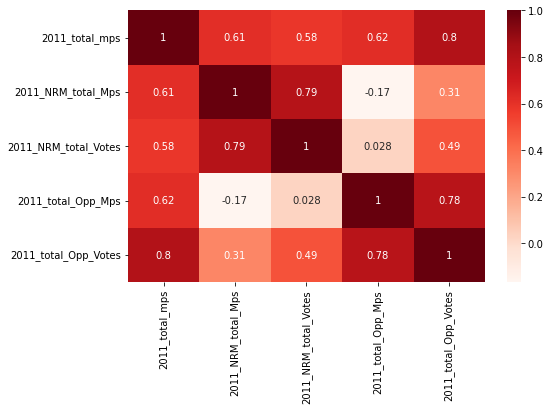

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(wmp11.corr(), cmap=plt.cm.Reds, annot=True)

In [ ]:
wmp11.to_csv('2011_total_mps.csv', index=False)


## 2016

In [ ]:
df16m = pd.read_csv('2016_Mps.csv')

In [ ]:
df16m

,2016_Mps,2016_NRM_Mps,2016_NRM_Votes,2016_Opp_Mps,2016_Opp_Votes,DISTRICT
0,1,1.0,17661.0,0.0,4091.0,ABIM
1,2,2.0,26830.0,0.0,14537.0,ADJUMANI
2,2,0.0,0.0,2.0,60562.0,AGAGO
3,1,0.0,0.0,1.0,32429.0,ALEBTONG
4,1,1.0,21627.0,0.0,24378.0,AMOLATAR
...,...,...,...,...,...,...
99,3,1.0,15662.0,2.0,71108.0,SOROTI
100,4,2.0,23306.0,2.0,105309.0,TORORO
101,1,1.0,8827.0,0.0,18292.0,WAKISO
102,3,2.0,19366.0,1.0,47831.0,YUMBE


In [ ]:
# women
df16w = pd.read_csv('WMP_2016.csv')

In [ ]:
df16w

,2016_WMps,DISTRICT,2016_WNRM_Votes,2016_WNRM_Mps,2016_Opp_WMps,2016_WOpp_Votes
0,1,ABIM,12054.0,1.0,0.0,9883.0
1,1,AGAGO,0.0,0.0,0.0,0.0
2,1,AMOLATAR,20326.0,1.0,0.0,25530.0
3,1,AMUDAT,0.0,0.0,0.0,0.0
4,1,AMURIA,33891.0,1.0,0.0,44027.0
...,...,...,...,...,...,...
82,1,SERERE,48762.0,1.0,0.0,33091.0
83,1,SHEEMA,0.0,0.0,0.0,0.0
84,1,SIRONKO,41536.0,1.0,0.0,41477.0
85,1,SOROTI,0.0,0.0,0.0,0.0


In [ ]:
wmp16 = df16m.merge(df16w, how='left', left_on='DISTRICT', right_on='DISTRICT')

In [ ]:
wmp16

,2016_Mps,2016_NRM_Mps,2016_NRM_Votes,2016_Opp_Mps,2016_Opp_Votes,DISTRICT,2016_WMps,2016_WNRM_Votes,2016_WNRM_Mps,2016_Opp_WMps,2016_WOpp_Votes
0,1,1.0,17661.0,0.0,4091.0,ABIM,1.0,12054.0,1.0,0.0,9883.0
1,2,2.0,26830.0,0.0,14537.0,ADJUMANI,NaN,NaN,NaN,NaN,NaN
2,2,0.0,0.0,2.0,60562.0,AGAGO,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,1.0,32429.0,ALEBTONG,NaN,NaN,NaN,NaN,NaN
4,1,1.0,21627.0,0.0,24378.0,AMOLATAR,1.0,20326.0,1.0,0.0,25530.0
...,...,...,...,...,...,...,...,...,...,...,...
99,3,1.0,15662.0,2.0,71108.0,SOROTI,1.0,0.0,0.0,0.0,0.0
100,4,2.0,23306.0,2.0,105309.0,TORORO,NaN,NaN,NaN,NaN,NaN
101,1,1.0,8827.0,0.0,18292.0,WAKISO,NaN,NaN,NaN,NaN,NaN
102,3,2.0,19366.0,1.0,47831.0,YUMBE,NaN,NaN,NaN,NaN,NaN


In [ ]:
wmp16.fillna(0, inplace=True)

In [ ]:
wmp16['2016_total_mps'] = wmp16['2016_Mps'] + wmp16['2016_WMps']

wmp16['2016_NRM_total_Mps'] = wmp16['2016_NRM_Mps'] +  wmp16['2016_WNRM_Mps']

wmp16['2016_NRM_total_Votes'] = wmp16['2016_NRM_Votes'] + wmp16['2016_WNRM_Votes']

wmp16['2016_total_Opp_Mps'] = wmp16['2016_Opp_Mps'] + wmp16['2016_Opp_WMps']

wmp16['2016_total_Opp_Votes'] = wmp16['2016_Opp_Votes'] + wmp16['2016_WOpp_Votes']

In [ ]:
wmp16

,2016_Mps,2016_NRM_Mps,2016_NRM_Votes,2016_Opp_Mps,2016_Opp_Votes,DISTRICT,2016_WMps,2016_WNRM_Votes,2016_WNRM_Mps,2016_Opp_WMps,2016_WOpp_Votes,2016_total_mps,2016_NRM_total_Mps,2016_NRM_total_Votes,2016_total_Opp_Mps,2016_total_Opp_Votes
0,1,1.0,17661.0,0.0,4091.0,ABIM,1.0,12054.0,1.0,0.0,9883.0,2.0,2.0,29715.0,0.0,13974.0
1,2,2.0,26830.0,0.0,14537.0,ADJUMANI,0.0,0.0,0.0,0.0,0.0,2.0,2.0,26830.0,0.0,14537.0
2,2,0.0,0.0,2.0,60562.0,AGAGO,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,60562.0
3,1,0.0,0.0,1.0,32429.0,ALEBTONG,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,32429.0
4,1,1.0,21627.0,0.0,24378.0,AMOLATAR,1.0,20326.0,1.0,0.0,25530.0,2.0,2.0,41953.0,0.0,49908.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,3,1.0,15662.0,2.0,71108.0,SOROTI,1.0,0.0,0.0,0.0,0.0,4.0,1.0,15662.0,2.0,71108.0
100,4,2.0,23306.0,2.0,105309.0,TORORO,0.0,0.0,0.0,0.0,0.0,4.0,2.0,23306.0,2.0,105309.0
101,1,1.0,8827.0,0.0,18292.0,WAKISO,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8827.0,0.0,18292.0
102,3,2.0,19366.0,1.0,47831.0,YUMBE,0.0,0.0,0.0,0.0,0.0,3.0,2.0,19366.0,1.0,47831.0


In [ ]:
wmp16.columns

Index(['2016_Mps', '2016_NRM_Mps', '2016_NRM_Votes', '2016_Opp_Mps',
       '2016_Opp_Votes', 'DISTRICT', '2016_WMps', '2016_WNRM_Votes',
       '2016_WNRM_Mps', '2016_Opp_WMps', '2016_WOpp_Votes', '2016_total_mps',
       '2016_NRM_total_Mps', '2016_NRM_total_Votes', '2016_total_Opp_Mps',
       '2016_total_Opp_Votes'],
      dtype='object')

In [ ]:
wmp16.drop(['2016_Mps', '2016_NRM_Mps', '2016_NRM_Votes', '2016_Opp_Mps',
       '2016_Opp_Votes', '2016_WMps', '2016_WNRM_Votes',
       '2016_WNRM_Mps', '2016_Opp_WMps', '2016_WOpp_Votes'], axis=1, inplace=True)

In [ ]:
wmp16

,DISTRICT,2016_total_mps,2016_NRM_total_Mps,2016_NRM_total_Votes,2016_total_Opp_Mps,2016_total_Opp_Votes
0,ABIM,2.0,2.0,29715.0,0.0,13974.0
1,ADJUMANI,2.0,2.0,26830.0,0.0,14537.0
2,AGAGO,3.0,0.0,0.0,2.0,60562.0
3,ALEBTONG,1.0,0.0,0.0,1.0,32429.0
4,AMOLATAR,2.0,2.0,41953.0,0.0,49908.0
...,...,...,...,...,...,...
99,SOROTI,4.0,1.0,15662.0,2.0,71108.0
100,TORORO,4.0,2.0,23306.0,2.0,105309.0
101,WAKISO,1.0,1.0,8827.0,0.0,18292.0
102,YUMBE,3.0,2.0,19366.0,1.0,47831.0


In [ ]:
wmp16.to_csv('2016_total_mps.csv', index=True)

### 2021

In [ ]:
dfm21 = pd.read_csv('2021_Mps.csv')

In [ ]:
dfm21

,Unnamed: 0,DISTRICT,2021_MPs,2021_NRM_MPs,2021_NRM_Votes,2021_Opp_Mps,2021_Opp_Votes
0,0,ABIM,1,1.0,14738.0,0.0,9257.0
1,1,ADJUMANI,2,2.0,22241.0,0.0,25384.0
2,2,AGAGO,3,3.0,27231.0,0.0,38289.0
3,3,ALEBTONG,2,2.0,29499.0,0.0,37513.0
4,4,AMOLATAR,2,1.0,14021.0,1.0,38187.0
...,...,...,...,...,...,...,...
141,141,TEREGO,2,2.0,20762.0,0.0,28497.0
142,142,TORORO,7,6.0,69014.0,1.0,87638.0
143,143,WAKISO,8,0.0,0.0,8.0,552951.0
144,144,YUMBE,4,4.0,40837.0,0.0,29396.0


In [ ]:
dfm21.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
dfw21 = pd.read_csv('WMP_2021.csv')

In [ ]:
wmp21 = dfw21.merge(dfm21, how='left', left_on='DISTRICT', right_on='DISTRICT')

In [ ]:
wmp21.fillna(0, inplace=True)

In [ ]:
wmp21

,DISTRICT,2021_WMPs,2021_NRM_WMPs,2021_WNRM_Votes,2021_Opp_WMps,2021_WOpp_Votes,2021_MPs,2021_NRM_MPs,2021_NRM_Votes,2021_Opp_Mps,2021_Opp_Votes
0,ABIM,1,1.0,7705.0,0.0,16315.0,1.0,1.0,14738.0,0.0,9257.0
1,ADJUMANI,1,1.0,32488.0,0.0,15318.0,2.0,2.0,22241.0,0.0,25384.0
2,AGAGO,1,1.0,31621.0,0.0,33750.0,3.0,3.0,27231.0,0.0,38289.0
3,ALEBTONG,1,1.0,29184.0,0.0,37909.0,2.0,2.0,29499.0,0.0,37513.0
4,AMOLATAR,1,1.0,23926.0,0.0,28508.0,2.0,1.0,14021.0,1.0,38187.0
...,...,...,...,...,...,...,...,...,...,...,...
155,TORORO,1,1.0,76662.0,0.0,80690.0,7.0,6.0,69014.0,1.0,87638.0
156,WAKISO,1,0.0,0.0,1.0,559114.0,8.0,0.0,0.0,8.0,552951.0
157,WORKERS REPRESENTATIVES TO PARLIAMENT,4,2.0,499.0,2.0,1303.0,0.0,0.0,0.0,0.0,0.0
158,YUMBE,1,1.0,38712.0,0.0,33602.0,4.0,4.0,40837.0,0.0,29396.0


In [ ]:
wmp21.columns

Index(['DISTRICT', '2021_WMPs', '2021_NRM_WMPs', '2021_WNRM_Votes',
       '2021_Opp_WMps', '2021_WOpp_Votes', '2021_MPs', '2021_NRM_MPs',
       '2021_NRM_Votes', '2021_Opp_Mps', '2021_Opp_Votes'],
      dtype='object')

In [ ]:
wmp21['2021_total_mps'] = wmp21['2021_MPs'] + wmp21['2021_WMPs']

wmp21['2021_NRM_total_Mps'] = wmp21['2021_NRM_MPs'] +  wmp21['2021_NRM_WMPs']

wmp21['2021_NRM_total_Votes'] = wmp21['2021_NRM_Votes'] + wmp21['2021_WNRM_Votes']

wmp21['2021_total_Opp_Mps'] = wmp21['2021_Opp_Mps'] + wmp21['2021_Opp_WMps']

wmp21['2021_total_Opp_Votes'] = wmp21['2021_Opp_Votes'] + wmp21['2021_WOpp_Votes']

In [ ]:
wmp21

,DISTRICT,2021_WMPs,2021_NRM_WMPs,2021_WNRM_Votes,2021_Opp_WMps,2021_WOpp_Votes,2021_MPs,2021_NRM_MPs,2021_NRM_Votes,2021_Opp_Mps,2021_Opp_Votes,2021_total_mps,2021_NRM_total_Mps,2021_NRM_total_Votes,2021_total_Opp_Mps,2021_total_Opp_Votes
0,ABIM,1,1.0,7705.0,0.0,16315.0,1.0,1.0,14738.0,0.0,9257.0,2.0,2.0,22443.0,0.0,25572.0
1,ADJUMANI,1,1.0,32488.0,0.0,15318.0,2.0,2.0,22241.0,0.0,25384.0,3.0,3.0,54729.0,0.0,40702.0
2,AGAGO,1,1.0,31621.0,0.0,33750.0,3.0,3.0,27231.0,0.0,38289.0,4.0,4.0,58852.0,0.0,72039.0
3,ALEBTONG,1,1.0,29184.0,0.0,37909.0,2.0,2.0,29499.0,0.0,37513.0,3.0,3.0,58683.0,0.0,75422.0
4,AMOLATAR,1,1.0,23926.0,0.0,28508.0,2.0,1.0,14021.0,1.0,38187.0,3.0,2.0,37947.0,1.0,66695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,TORORO,1,1.0,76662.0,0.0,80690.0,7.0,6.0,69014.0,1.0,87638.0,8.0,7.0,145676.0,1.0,168328.0
156,WAKISO,1,0.0,0.0,1.0,559114.0,8.0,0.0,0.0,8.0,552951.0,9.0,0.0,0.0,9.0,1112065.0
157,WORKERS REPRESENTATIVES TO PARLIAMENT,4,2.0,499.0,2.0,1303.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,499.0,2.0,1303.0
158,YUMBE,1,1.0,38712.0,0.0,33602.0,4.0,4.0,40837.0,0.0,29396.0,5.0,5.0,79549.0,0.0,62998.0


In [ ]:
wmp21.columns

Index(['DISTRICT', '2021_WMPs', '2021_NRM_WMPs', '2021_WNRM_Votes',
       '2021_Opp_WMps', '2021_WOpp_Votes', '2021_MPs', '2021_NRM_MPs',
       '2021_NRM_Votes', '2021_Opp_Mps', '2021_Opp_Votes', '2021_total_mps',
       '2021_NRM_total_Mps', '2021_NRM_total_Votes', '2021_total_Opp_Mps',
       '2021_total_Opp_Votes'],
      dtype='object')

In [ ]:
wmp21.drop(['2021_WMPs', '2021_NRM_WMPs', '2021_WNRM_Votes',
       '2021_Opp_WMps', '2021_WOpp_Votes', '2021_MPs', '2021_NRM_MPs',
       '2021_NRM_Votes', '2021_Opp_Mps', '2021_Opp_Votes'], axis=1, inplace=True)

In [ ]:
wmp21

,DISTRICT,2021_total_mps,2021_NRM_total_Mps,2021_NRM_total_Votes,2021_total_Opp_Mps,2021_total_Opp_Votes
0,ABIM,2.0,2.0,22443.0,0.0,25572.0
1,ADJUMANI,3.0,3.0,54729.0,0.0,40702.0
2,AGAGO,4.0,4.0,58852.0,0.0,72039.0
3,ALEBTONG,3.0,3.0,58683.0,0.0,75422.0
4,AMOLATAR,3.0,2.0,37947.0,1.0,66695.0
...,...,...,...,...,...,...
155,TORORO,8.0,7.0,145676.0,1.0,168328.0
156,WAKISO,9.0,0.0,0.0,9.0,1112065.0
157,WORKERS REPRESENTATIVES TO PARLIAMENT,4.0,2.0,499.0,2.0,1303.0
158,YUMBE,5.0,5.0,79549.0,0.0,62998.0


<AxesSubplot:>

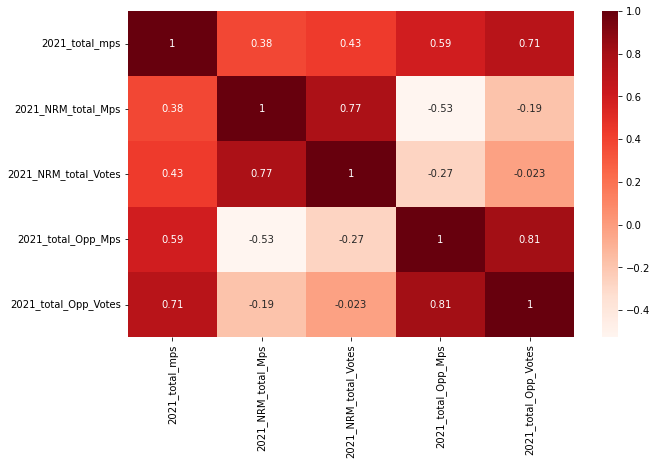

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(wmp21.corr(), annot=True, cmap=plt.cm.Reds)

In [ ]:
wmp21['2021_NRM_Score'] = wmp21['2021_NRM_total_Mps']/wmp21['2021_total_mps']

In [ ]:
wmp21

,DISTRICT,2021_total_mps,2021_NRM_total_Mps,2021_NRM_total_Votes,2021_total_Opp_Mps,2021_total_Opp_Votes,2021_NRM_Score
0,ABIM,2.0,2.0,22443.0,0.0,25572.0,1.000000
1,ADJUMANI,3.0,3.0,54729.0,0.0,40702.0,1.000000
2,AGAGO,4.0,4.0,58852.0,0.0,72039.0,1.000000
3,ALEBTONG,3.0,3.0,58683.0,0.0,75422.0,1.000000
4,AMOLATAR,3.0,2.0,37947.0,1.0,66695.0,0.666667
...,...,...,...,...,...,...,...
155,TORORO,8.0,7.0,145676.0,1.0,168328.0,0.875000
156,WAKISO,9.0,0.0,0.0,9.0,1112065.0,0.000000
157,WORKERS REPRESENTATIVES TO PARLIAMENT,4.0,2.0,499.0,2.0,1303.0,0.500000
158,YUMBE,5.0,5.0,79549.0,0.0,62998.0,1.000000


In [ ]:
mp11 = pd.read_csv('2011_total_mps.csv')
mp16 = pd.read_csv('2016_total_mps.csv')
mp21 = pd.read_csv('2021_total_mps.csv')

In [ ]:
mp11.fillna(0, inplace=True)
mp16.fillna(0, inplace=True)
mp21.fillna(0, inplace=True)

In [ ]:
print(mp11.columns)
print(mp16.columns)
print(mp21.columns)

Index(['2011_total_mps', '2011_NRM_total_Mps', '2011_NRM_total_Votes',
       '2011_total_Opp_Mps', '2011_total_Opp_Votes', 'District'],
      dtype='object')
Index(['Unnamed: 0', 'DISTRICT', '2016_total_mps', '2016_NRM_total_Mps',
       '2016_NRM_total_Votes', '2016_total_Opp_Mps', '2016_total_Opp_Votes'],
      dtype='object')
Index(['Unnamed: 0', 'DISTRICT', '2021_total_mps', '2021_NRM_total_Mps',
       '2021_NRM_total_Votes', '2021_total_Opp_Mps', '2021_total_Opp_Votes',
       '2021_NRM_Score'],
      dtype='object')


In [ ]:
print(mp11.shape)
print(mp16.shape)
print(mp21.shape)

(111, 6)
(104, 7)
(160, 8)


In [ ]:
mp16.drop('Unnamed: 0', axis=1, inplace=True)
mp21.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
mp11.rename(columns = {'District':'DISTRICT'}, inplace = True)

In [ ]:
mp1116 = mp11.merge(mp16,how='left', left_on='DISTRICT', right_on='DISTRICT')

In [ ]:
mp111621 = mp21.merge(mp1116, how='left', left_on='DISTRICT', right_on='DISTRICT')

In [ ]:
mp111621.fillna(0, inplace=True)

In [ ]:
mp111621.columns

Index(['DISTRICT', '2021_total_mps', '2021_NRM_total_Mps',
       '2021_NRM_total_Votes', '2021_total_Opp_Mps', '2021_total_Opp_Votes',
       '2021_NRM_Score', '2011_total_mps', '2011_NRM_total_Mps',
       '2011_NRM_total_Votes', '2011_total_Opp_Mps', '2011_total_Opp_Votes',
       '2016_total_mps', '2016_NRM_total_Mps', '2016_NRM_total_Votes',
       '2016_total_Opp_Mps', '2016_total_Opp_Votes'],
      dtype='object')

In [ ]:
mp111621.to_csv('final_set.csv', index=False)

In [4]:
%cd '/content/drive/MyDrive/preprocessed/mps'

/content/drive/MyDrive/preprocessed/mps


In [79]:
mp111621 = pd.read_csv('final_set.csv')

In [ ]:
mp111621

In [7]:
mp111621.columns

Index(['DISTRICT', '2021_total_mps', '2021_NRM_total_Mps',
       '2021_NRM_total_Votes', '2021_total_Opp_Mps', '2021_total_Opp_Votes',
       '2021_NRM_Score', '2011_total_mps', '2011_NRM_total_Mps',
       '2011_NRM_total_Votes', '2011_total_Opp_Mps', '2011_total_Opp_Votes',
       '2016_total_mps', '2016_NRM_total_Mps', '2016_NRM_total_Votes',
       '2016_total_Opp_Mps', '2016_total_Opp_Votes'],
      dtype='object')

In [80]:
mp111621.drop(['2021_total_mps', '2021_NRM_total_Mps', 'DISTRICT',
       '2021_NRM_total_Votes', '2021_total_Opp_Mps', '2021_total_Opp_Votes'], axis=1, inplace=True)

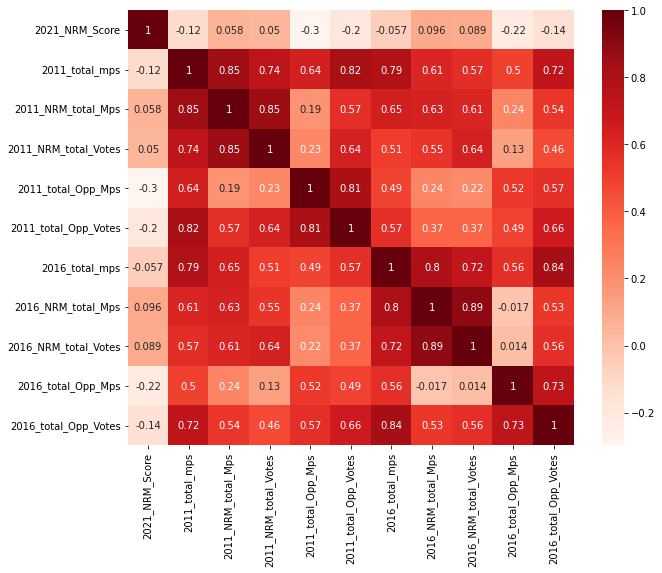

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(mp111621.corr(), cmap=plt.cm.Reds, annot=True)

In [82]:
mp111621.drop(['2016_NRM_total_Votes', '2011_total_mps',], axis=1, inplace=True)

In [12]:
# mp111621.drop([ '2011_total_mps','2011_NRM_total_Votes', '2016_NRM_total_Mps',  '2016_total_mps'], axis=1, inplace=True)

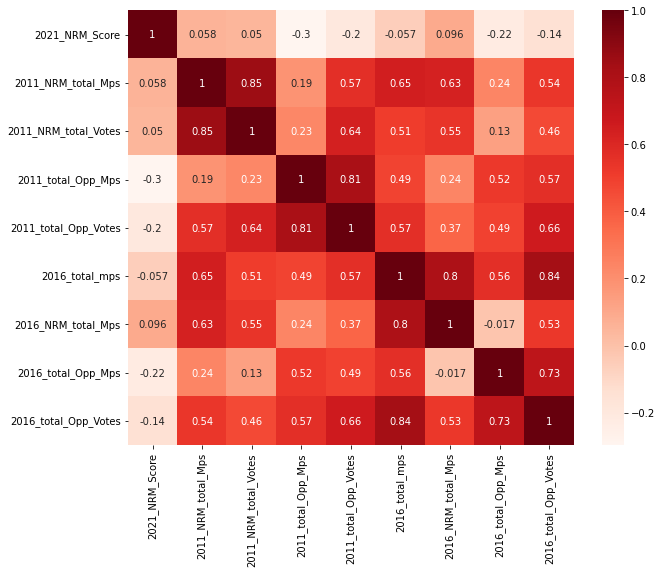

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(mp111621.corr(), cmap=plt.cm.Reds, annot=True)

In [84]:
mp111621.drop(['2011_NRM_total_Mps', '2011_total_Opp_Mps', '2016_total_mps'], axis=1, inplace=True)

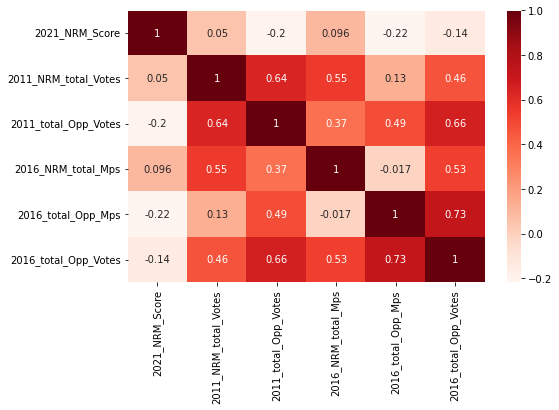

In [85]:
plt.figure(figsize=(8,5))
sns.heatmap(mp111621.corr(), cmap=plt.cm.Reds, annot=True)

In [56]:
# mp111621.drop(['2016_total_Opp_Votes'], axis=1, inplace=True)
# mp111621.drop(['DISTRICT'], axis=1, inplace=True)

In [86]:
ym = mp111621['2021_NRM_Score']
Xm = mp111621.drop(['2021_NRM_Score'], axis=1)

In [87]:
Xm

,2011_NRM_total_Votes,2011_total_Opp_Votes,2016_NRM_total_Mps,2016_total_Opp_Mps,2016_total_Opp_Votes
0,18411.0,17646.0,2.0,0.0,13974.0
1,13925.0,18599.0,2.0,0.0,14537.0
2,20244.0,25027.0,0.0,2.0,60562.0
3,39515.0,60053.0,0.0,1.0,32429.0
4,19240.0,15730.0,2.0,0.0,49908.0
...,...,...,...,...,...
155,41165.0,214252.0,2.0,2.0,105309.0
156,212473.0,482094.0,1.0,0.0,18292.0
157,0.0,0.0,0.0,0.0,0.0
158,23249.0,86474.0,2.0,1.0,47831.0


In [88]:
Xm_scaled = StandardScaler().fit_transform(Xm)
# X_norm = Normalizer().fit_transform(df)
# X_pca = PCA(n_components=5).fit_transform(Xm_scaled)

In [89]:
xtra, xte, ytra, yte = train_test_split(Xm_scaled, ym, random_state=42, test_size=0.2)

In [90]:
# xgr = XGBRegressor()
# cbr = CatBoostRegressor()
# lgr = LGBMRegressor()

rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
exr  = ExtraTreesRegressor()
dt = DecisionTreeRegressor()
lsvr = LinearSVR()
nsvr = NuSVR()
svr = SVR()
knr = KNeighborsRegressor()

In [91]:
# xgr.fit(xtra, ytra)
# cbr.fit(xtra, ytra)
# lgr.fit(xtra, ytra)
rf.fit(xtra, ytra)
gbr.fit(xtra, ytra)
exr.fit(xtra, ytra)
dt.fit(xtra, ytra)
lsvr.fit(xtra, ytra)
nsvr.fit(xtra, ytra)
svr.fit(xtra, ytra)
knr.fit(xtra, ytra)

KNeighborsRegressor()

In [92]:
xtra.shape

(128, 5)

In [93]:
# print(xgr.score(xtra, ytra))
# print(cbr.score(xtra, ytra))
# print(lgr.score(xtra, ytra))
print(rf.score(xtra, ytra))
print(gbr.score(xtra, ytra))
print(exr.score(xtra, ytra))
print(dt.score(xtra, ytra))
print(lsvr.score(xtra, ytra))
print(nsvr.score(xtra, ytra))
print(svr.score(xtra, ytra))
print(knr.score(xtra, ytra))

0.49959384254427697
0.5737531095647224
0.5975659241816675
0.5975659241816675
-0.08583304440263517
0.163443957908745
0.09875445203400135
0.15957551585522234


In [94]:
print(rf.score(xte, yte))
print(gbr.score(xte, yte))
print(exr.score(xte, yte))
print(dt.score(xte, yte))

0.004754136658744135
0.021406213515285377
-0.19542166035461195
-0.9616895028429819


In [95]:
import pickle

pickle.dump(exr, open('parliamentary_model.pkl', 'wb'))